# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOADING DATASETS

In [26]:
product = pd.read_csv("product.csv")
product.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold


In [25]:
customer = pd.read_csv("customer.csv")
customer.head()

,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19.00,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,C0027,Individual,Lara,Carrillo,22.00,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,C0112,Individual,Donavan,Flowers,22.00,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,C0160,Individual,Darien,Dorsey,22.00,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,C0014,Individual,Alessandra,Perry,25.00,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


# ACTUAL DATA PREPARATION

We have to make two sets of data, i.e. 

- x set of the attributes from the product dataset (Area.ft & Price)
- y set of the target function containing 5 classes from the customer dataset (Deal Satisfaction)

In [4]:
dict_data = {"Area (ft)":product["Area (ft.)"], "Price":product["Price"]}
house_measure = pd.DataFrame(data=dict_data)

In [5]:
x = house_measure[0:195]
x

,Area (ft),Price
0,743.09,246172.68
1,756.21,246331.90
2,587.28,209280.91
3,1604.75,452667.01
4,1375.45,467083.31
5,675.19,203491.85
6,670.89,212520.83
7,720.81,198591.85
8,782.25,265467.68
9,794.52,235633.26


In [6]:
y = customer["Deal satisfaction"].dropna().astype("category")
y

0      5.0
1      5.0
2      1.0
3      3.0
4      4.0
5      5.0
6      5.0
7      5.0
8      2.0
9      3.0
10     1.0
11     5.0
12     3.0
13     2.0
14     5.0
15     5.0
16     4.0
17     4.0
18     5.0
19     3.0
20     5.0
21     5.0
22     5.0
23     4.0
24     4.0
25     5.0
26     1.0
27     1.0
28     3.0
29     4.0
      ... 
165    5.0
166    3.0
167    2.0
168    5.0
169    5.0
170    3.0
171    3.0
172    2.0
173    2.0
174    3.0
175    5.0
176    4.0
177    3.0
179    5.0
180    5.0
181    4.0
182    5.0
183    1.0
184    1.0
185    5.0
186    3.0
187    5.0
188    5.0
189    5.0
190    5.0
191    5.0
192    5.0
193    5.0
194    5.0
195    5.0
Name: Deal satisfaction, Length: 195, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

# SOME DESCRIPTIVE ANALYSIS ON 'x' DATASET

In [7]:
# description of x set

x.describe()

,Area (ft),Price
count,195.000000,195.000000
mean,905.732154,271120.972667
std,268.054294,82179.704080
min,410.710000,117564.070000
25%,743.090000,213231.695000
50%,790.540000,244820.670000
75%,1101.125000,310400.165000
max,1942.500000,532877.380000


In [8]:
# description of y set

y.describe()

count     195.0
unique      5.0
top         5.0
freq       72.0
Name: Deal satisfaction, dtype: float64

In [9]:
# Correlation matrix of x set

print(x.corr())
print("\nBoth the attributes of x are highly correlated")

           Area (ft)     Price
Area (ft)   1.000000  0.944204
Price       0.944204  1.000000

Both the attributes of x are highly correlated


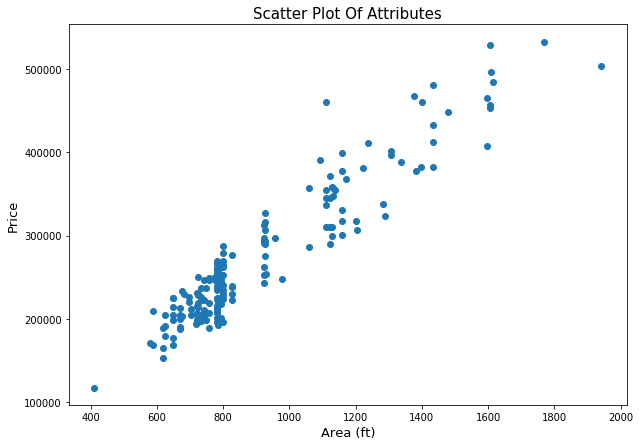

In [30]:
# Scatter Plot of the attributes

plt.figure(figsize=(10,7))
plt.title("Scatter Plot Of Attributes",fontsize=15)
plt.xlabel("Area (ft)",fontsize=13)
plt.ylabel("Price",fontsize=13)
plt.scatter(x["Area (ft)"],x["Price"])

In [18]:
# max and min values of attributes

print("Max value of Area (ft) is ",x["Area (ft)"].max())
print("Max value of Price is ",x["Price"].max())
print("Min value of Area (ft) is ",x["Area (ft)"].min())
print("Min value of Price is ",x["Price"].min())

Max value of Area (ft) is  1942.5
Max value of Price is  532877.38
Min value of Area (ft) is  410.71
Min value of Price is  117564.07


In [23]:
# Central Tendencies of attributes

print("==== Means ====")
print("Mean Value of Area (ft): ",x["Area (ft)"].mean())
print("Mean Value of Price: ",x["Price"].mean())

print("\n==== Medians ====")
print("Median Value of Area (ft): ",x["Area (ft)"].median())
print("Median Value of Prtce: ",x["Price"].median())

print("\n==== Standard Deviations ====")
print("Standard Deviation of Area (ft): ",x["Area (ft)"].std())
print("Standard Deviation of Price: ",x["Price"].std())


==== Means ====
Mean Value of Area (ft):  905.7321538461538
Mean Value of Price:  271120.9726666669

==== Medians ====
Median Value of Area (ft):  790.54
Median Value of Prtce:  244820.67

==== Standard Deviations ====
Standard Deviation of Area (ft):  268.05429392614514
Standard Deviation of Price:  82179.70408008099


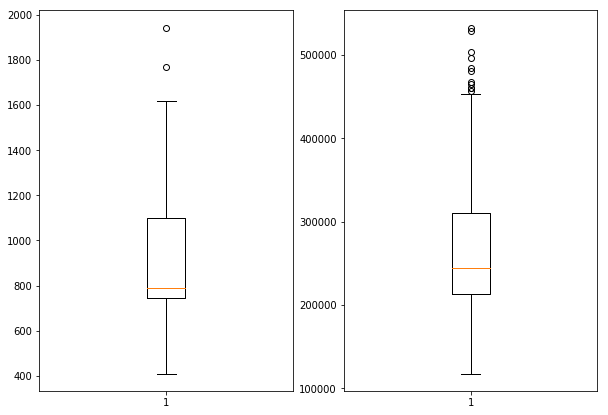

In [37]:
# Box Plots of attributes

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.boxplot(x["Area (ft)"])

plt.subplot(1,2,2)
plt.boxplot(x["Price"])

plt.show()